In [1]:
# p43 (p64 PDF) 

%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

c:\Users\duyni\miniconda3\envs\qiskit_env\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


# Chapter 10 - Aer

In [2]:
# p260 (p281 PDF) 

# View all available Aer backends
Aer.backends()


[<QasmSimulator('qasm_simulator') from AerProvider()>,
 <StatevectorSimulator('statevector_simulator') from AerProvider()>,
 <UnitarySimulator('unitary_simulator') from AerProvider()>,
 <PulseSimulator('pulse_simulator') from AerProvider()>]

In [3]:
# p260 (p281 PDF) 

from qiskit import BasicAer
BasicAer.backends() 


[<QasmSimulatorPy('qasm_simulator') from BasicAer()>,
 <StatevectorSimulatorPy('statevector_simulator') from BasicAer()>,
 <UnitarySimulatorPy('unitary_simulator') from BasicAer()>]

In [4]:
# p261 (p282 PDF) 

# View all available IBMQ backends
provider.backends()


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [5]:
# p262 (p283 PDF) 

# View all IBMQ provider simulators only
provider.backends(simulator=True)


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [6]:
# p263 (p284 PDF) 

# Create a quantum circuit
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])


In [7]:
# p264 (p285 PDF) 

# Import the QasmSimulator from Aer provider
from qiskit.providers.aer import QasmSimulator
backend_simulator = QasmSimulator()
# Set the backend options, method set to statevector
options = {'method': 'statevector'}
# Execute circuit using the backend options created
job = execute(qc, backend_simulator, backend_options=options)
# Print out the result counts
result = job.result()
counts = result.get_counts(qc)
print(counts)


{'00': 526, '11': 498}


In [8]:
# p264 (p285 PDF) 

# Get the Qasm simulator and set the backend options
aer_qasm_simulator = Aer.get_backend('qasm_simulator')
options = {'method': 'statevector'}
# Execute the circuit with the Aer Qasm simulator
job = execute(qc, aer_qasm_simulator, backend_options=options)


In [9]:
# p265 (p286 PDF) 

# Set the backend options, method set to statevector
options = {'method': 'statevector', 'memory':True, 'shots':10}
# Execute circuit using the backend options created
job = execute(qc, backend_simulator, backend_options=options)
result = job.result()
# Pull the memory slots for the circuit
memory = result.get_memory(qc)
# Print the results from the memory slots
print('Memory results: ', memory)


Memory results:  ['11', '00', '11', '11', '11', '11', '11', '00', '00', '00']


In [10]:
# p265 (p286 PDF)

# View each measurement individually by enabling the memory parameter
aer_backend = Aer.get_backend('qasm_simulator')
# Set backend, shots, and memory parameters and retrieve results
result = execute(qc, backend=aer_backend, shots=5, memory=True).result()

# Pull the memory slots results
memory = result.get_memory(qc)

# Print the memory slots
print('Memory results: ', memory)


Memory results:  ['00', '00', '11', '00', '11']


In [11]:
# p266 (p287 PDF)

# Construct a 2 qubit quantum circuit
qc_init = QuantumCircuit(2, 2)
# Import numpy to simplify some math for us
import numpy as np
# Select the qubits by their index which you wish to initialize
init_qubits = [0, 1]
# Inititialize qubit states
qc_init.initialize([1, 0, 0, 1] / np.sqrt(2), init_qubits)
# Add measurements and draw the initialized circuit
qc_init.measure(range(2), range(2))
qc_init.decompose()
qc_init.draw()


┌──────────────────────────────────┐┌─┐   
q_0: ┤0                                 ├┤M├───
     │  initialize(0.70711,0,0,0.70711) │└╥┘┌─┐
q_1: ┤1                                 ├─╫─┤M├
     └──────────────────────────────────┘ ║ └╥┘
c: 2/═════════════════════════════════════╩══╩═
                                          0  1

In [12]:
# p267 (p288 PDF)

# Set the memory to True so we can observe each result
result = execute(qc_init, aer_backend, shots=10, memory=True).result()
# Retrieve the individual results from the memory slots
memory = result.get_memory(qc_init)
# Print the memory slots
print(memory)


['00', '00', '11', '11', '11', '00', '00', '00', '00', '11']


In [13]:
# p267 (p288 PDF)

# Create a 4 qubit circuit
qc_init2 = QuantumCircuit(4, 4)

# Import numpy to help with some arithmetic
import numpy as np
# Initialize only the last 3 qubits
initialized_qubits = [1, 2, 3]

# Set the initial state, remember that the sum of amplitudes-squared 
# must equal 1
qc_init2.initialize([0, 1, 0, 1, 0, 1, 0, 1] / np.sqrt(4), initialized_qubits)

# Add a barrier so it is easier to read
qc_init2.barrier(range(4))

# Measure qubits, decompose and draw circuit
qc_init2.measure(range(4), range(4))
qc_init2.decompose()
qc_init2.draw()


░ ┌─┐         
q_0: ─────────────────────────────────────────░─┤M├─────────
     ┌──────────────────────────────────────┐ ░ └╥┘┌─┐      
q_1: ┤0                                     ├─░──╫─┤M├──────
     │                                      │ ░  ║ └╥┘┌─┐   
q_2: ┤1 initialize(0,0.5,0,0.5,0,0.5,0,0.5) ├─░──╫──╫─┤M├───
     │                                      │ ░  ║  ║ └╥┘┌─┐
q_3: ┤2                                     ├─░──╫──╫──╫─┤M├
     └──────────────────────────────────────┘ ░  ║  ║  ║ └╥┘
c: 4/════════════════════════════════════════════╩══╩══╩══╩═
                                                 0  1  2  3

{'0010': 269, '0110': 235, '1010': 255, '1110': 265}


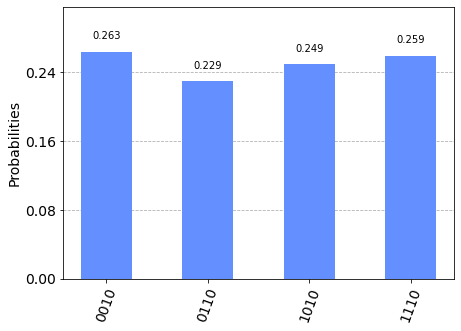

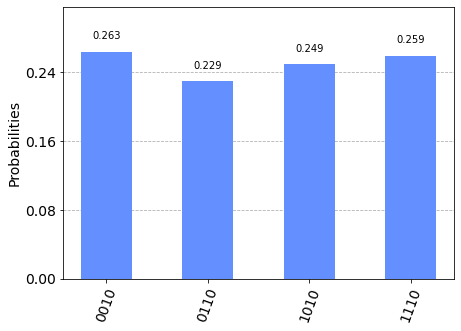

In [14]:
# p268 (p289 PDF)

# Execute the circuit and print results and histogram
result = execute(qc_init2, backend_simulator).result()
counts = result.get_counts(qc_init2)
print(counts)
plot_histogram(counts)


In [15]:
# p269 (p290 PDF)

# Create a 4-qubit circuit
qc_init_x = QuantumCircuit(4, 4)
# Import numpy 
import numpy as np
# Initialize the last 3 qubits, same as before
initialized_qubits = [1, 2, 3]
qc_init_x.initialize([0, 1, 0, 1, 0, 1, 0, 1] / np.sqrt(4), initialized_qubits)

# Add a barrier so it is easier to read
qc_init_x.barrier(range(4))
# Include an X gate on all qubits
for idx in range(4):
    qc_init_x.x(idx)
# Measure and draw the circuit
qc_init_x.measure(range(4), range(4))
qc_init_x.decompose()
qc_init_x.draw()


░ ┌───┐┌─┐         
q_0: ─────────────────────────────────────────░─┤ X ├┤M├─────────
     ┌──────────────────────────────────────┐ ░ ├───┤└╥┘┌─┐      
q_1: ┤0                                     ├─░─┤ X ├─╫─┤M├──────
     │                                      │ ░ ├───┤ ║ └╥┘┌─┐   
q_2: ┤1 initialize(0,0.5,0,0.5,0,0.5,0,0.5) ├─░─┤ X ├─╫──╫─┤M├───
     │                                      │ ░ ├───┤ ║  ║ └╥┘┌─┐
q_3: ┤2                                     ├─░─┤ X ├─╫──╫──╫─┤M├
     └──────────────────────────────────────┘ ░ └───┘ ║  ║  ║ └╥┘
c: 4/═════════════════════════════════════════════════╩══╩══╩══╩═
                                                      0  1  2  3

{'0001': 238, '0101': 259, '1001': 253, '1101': 274}


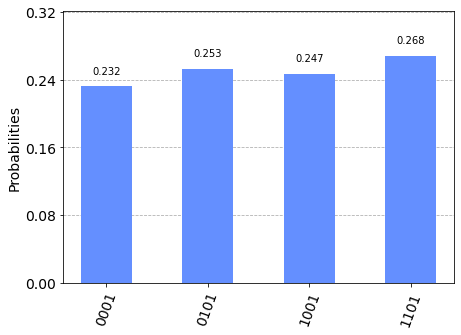

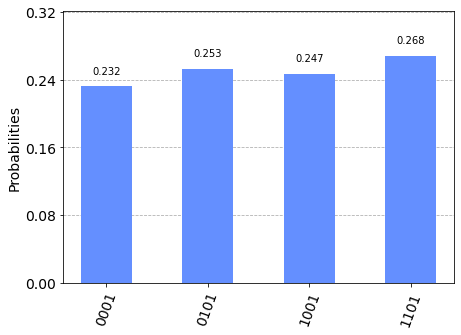

In [16]:
# p271 (p292 PDF)

# Execute and get counts
result = execute(qc_init_x, backend_simulator).result()
counts = result.get_counts(qc_init_x)
print(counts)
plot_histogram(counts)


# Running on a statevector simulator

In [17]:
# p272 (p293 PDF)

# Construct quantum circuit
qc = QuantumCircuit(1)
# Place qubit in superposition
qc.h(0)
qc.draw()


┌───┐
q_0: ┤ H ├
     └───┘

In [18]:
# p273 (p294 PDF)

# Select the Statevector simulator from the Aer provider
simulator = Aer.get_backend('statevector_simulator')
# Execute the circuit
result = execute(qc, simulator).result()
# Get the state vector and display the results
statevector = result.get_statevector(qc)
statevector


array([0.70710678+0.j, 0.70710678+0.j])

In [19]:
# p274 (p295 PDF)

# Construct quantum circuit 
qc = QuantumCircuit(2)
# Place both in superposition
qc.h(0)
qc.h(1)
qc.draw()


┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

In [20]:
# p274 (p295 PDF)

# Execute the circuit using the state vector simulator
result = execute(qc, simulator).result()
# Extract the state vector of the circuit from the results
statevector = result.get_statevector(qc)
# Output the state vector values
statevector


array([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])

In [21]:
# p275 (p296 PDF)

# Construct quantum circuit
qc = QuantumCircuit(2)
# Place the first qubit in superposition
qc.h(0)
# Entangle the two qubits together using a CNOT gate, 
# where the first is the control and the second qubit is the target.
qc.cx(0, 1)
# Execute the circuit on the state vector simulator
result = execute(qc, simulator).result()
# Obtain the state vector of the circuit
statevector = result.get_statevector(qc)
# Output the state vector values
statevector


array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

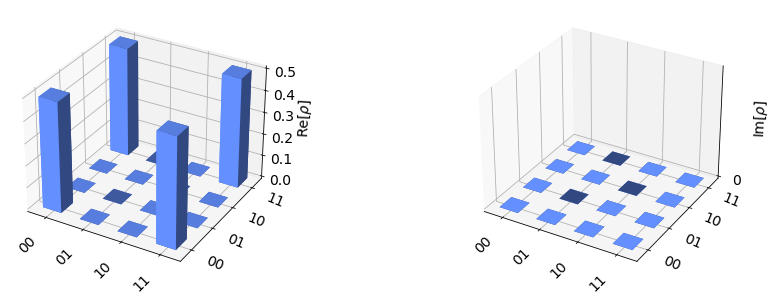

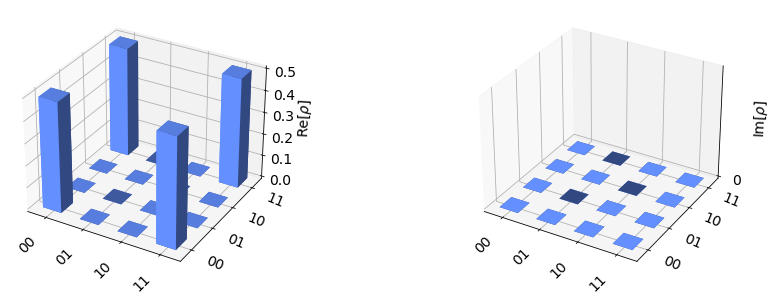

In [22]:
# p275 (p296 PDF)

# Display state vector
plot_state_city(statevector)


c:\Users\duyni\miniconda3\envs\qiskit_env\lib\site-packages\qiskit\visualization\state_visualization.py:59: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


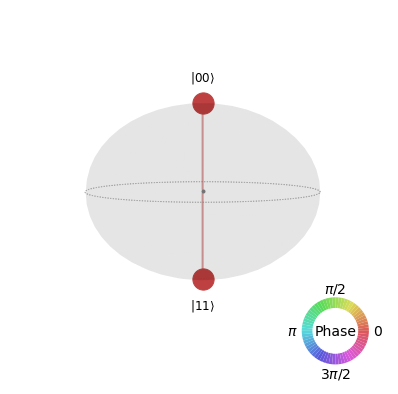

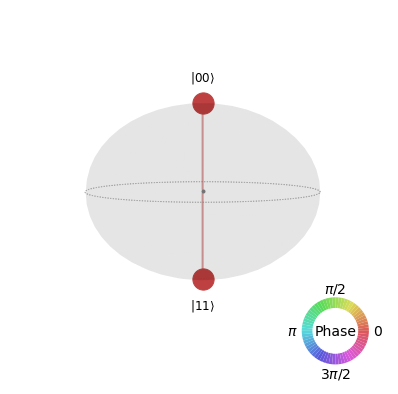

In [23]:
# p276 (p297 PDF)

# Import the qsphere class
from qiskit.visualization import plot_state_qsphere
%matplotlib inline
# Create quantum circuit
qc = QuantumCircuit(1)
# Place the qubit in a superposition state
qc.h(0)
# Execute the circuit on the statevector simulator
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator).result()
# Display the QSphere with result
plot_state_qsphere(statevector)

c:\Users\duyni\miniconda3\envs\qiskit_env\lib\site-packages\qiskit\visualization\state_visualization.py:59: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


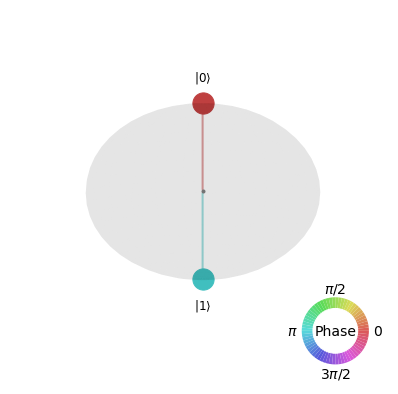

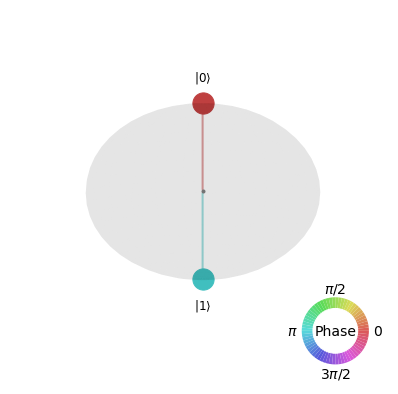

In [24]:
# p278 (p299 PDF)

# Create a quantum circuit
qc = QuantumCircuit(1)
# Rotate the state from |0 to |1 by applying an X gate
qc.x(0)
# Place qubit in a superposition from the |1 state
qc.h(0)
# Execute the circuit on the state vector simulator
job = execute(qc, simulator).result()
# Plot the results onto the QSphere
plot_state_qsphere(job.get_statevector(qc))


c:\Users\duyni\miniconda3\envs\qiskit_env\lib\site-packages\qiskit\visualization\state_visualization.py:59: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


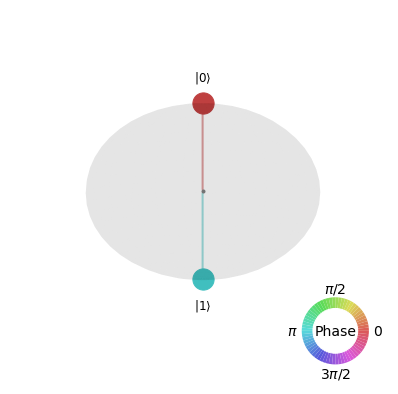

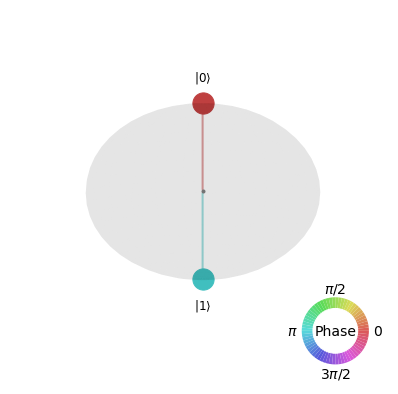

In [25]:
# p279 (p300 PDF)

# Create a quantum circuit
qc = QuantumCircuit(1)
# Place qubit in a superposition from the |0 state
qc.h(0)
# Apply a Z (phase) gate, to rotate it by an angle  around the Z axis
qc.z(0)
# Execute the circuit on the state vector simulator
job = execute(qc, simulator).result()
# Plot the results onto the QSphere
plot_state_qsphere(job.get_statevector(qc))


# Running on a Unitary simulator

In [26]:
# p281 (p302 PDF)

# Create a quantum circuit and add a Hadamard gate
qc = QuantumCircuit(1)
qc.h(0)

# Set the simulator to the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')

# Execute the circuit on the unitary simulator
result = execute(qc, simulator).result()
# Extract the unitary matrix from the results
unitary = result.get_unitary(qc)
# Print out the unitary matrix
print("Unitary of the circuit:\n", unitary)


Unitary of the circuit:
 [[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]]


In [27]:
# p281 (p302 PDF)

# Create a new circuit, adding an H gate followed by a Z gate
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)

# Execute the circuit on the unitary simulator
result = execute(qc, simulator).result()
# Retrieve the unitary matrix from the results
unitary = result.get_unitary(qc)
# Print the unitary matrix
print("Unitary of the circuit:\n", unitary)
qc.draw()


Unitary of the circuit:
 [[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [-0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]]


┌───┐┌───┐
q_0: ┤ H ├┤ Z ├
     └───┘└───┘

In [28]:
# p283 (p304 PDF)

# Create a quantum circuit
qc_init = QuantumCircuit(1)
# Set the initial unitary using the result from the previous example.
opts = {"initial_unitary": np.array([[ 1,  1],
                                     [-1, 1]]/np.sqrt(2))}

# Execute and obtain Unitary matrix of the circuit
result = execute(qc_init, simulator, backend_options=opts).result()
# Retrieve the unitary matrix from the result
unitary = result.get_unitary(qc_init)
# Print the unitary matrix results
print("Unitary of the circuit:\n", unitary)


Unitary of the circuit:
 [[ 0.70710678+0.j  0.70710678+0.j]
 [-0.70710678+0.j  0.70710678+0.j]]


# Running on a Pulse simulator

In [30]:
# p284 (p305 PDF)

# Import the PulseSystemModel
from qiskit.providers.aer.pulse import PulseSystemModel
# Import Pulse classes needed to generate a schedule
from qiskit.pulse import Play, DriveChannel
from qiskit.pulse import Schedule, Waveform

# Import numpy and generate the sin sample values
import numpy as np
x = np.linspace(0,2*np.pi,64)
data = np.sin(x)
# Generate a SamplePulse 
sample_pulse = Waveform(data, name="sin_64_pulse") 
# Create a schedule
schedules = Schedule(name='pulse_sample_schedule')
# Operate on the first qubit
qubit_idx = 0
# Insert the sample pulse
schedules = schedules.insert(0, Play(sample_pulse, DriveChannel(qubit_idx)))

# Instantiate the PulseSimulator
from qiskit.providers.aer import PulseSimulator
backend_sim = PulseSimulator()


# Assemble schedules using PulseSimulator as the backend
pulse_qobj = assemble(schedules, backend=backend_sim)
# Set the system model by replicating the ibmq_armonk backend
armonk_backend = provider.get_backend('ibm_brisbane')
system_model = PulseSystemModel.from_backend(armonk_backend)

# Run simulation on a PulseSystemModel object and print results
results = backend_sim.run(pulse_qobj, system_model)
print(results.qobj())


OverflowError: value too large

# Generating Noise models

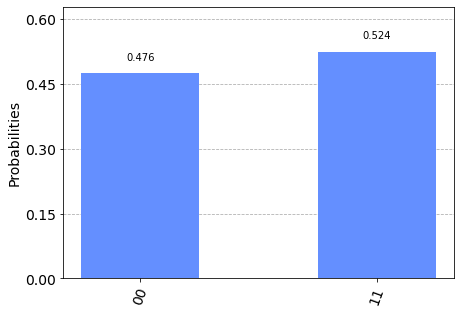

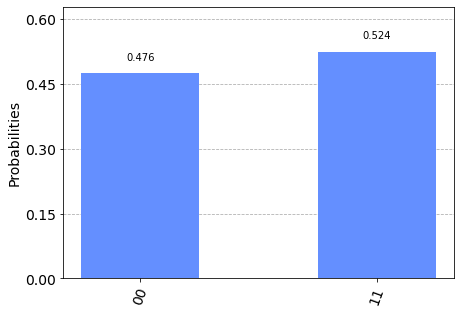

In [31]:
# p288 (p309 PDF)

from qiskit.tools.visualization import plot_histogram
# Create a 2-qubit circuit 
qc = QuantumCircuit(2, 2)
# Add some arbitrary gates and measurement operators
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

# Execute the circuit on the qasm simulator
result = execute(qc, Aer.get_backend('qasm_simulator')).result()
# Obtain and print results 
counts = result.get_counts()
plot_histogram(counts)


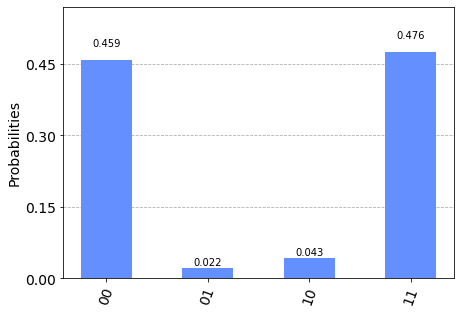

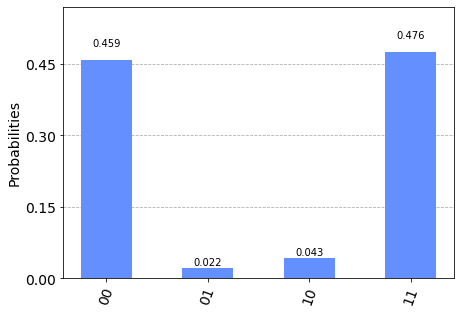

In [36]:
# p289 (p310 PDF)

# Execute the same circuit on a real quantum computer
result = execute(qc, provider.get_backend('ibm_perth')).result()
# Obtain and print results
counts = result.get_counts()
plot_histogram(counts)


Device reported a gate error parameter greater than maximum allowed value (1.000000 > 0.800000). Truncating to maximum value.
Device model returned a depolarizing error parameter greater than maximum allowed value (1.067597 > 1.066667). Truncating to maximum value.
Device reported a gate error parameter greater than maximum allowed value (1.000000 > 0.800000). Truncating to maximum value.
Device model returned a depolarizing error parameter greater than maximum allowed value (1.067176 > 1.066667). Truncating to maximum value.
Device reported a gate error parameter greater than maximum allowed value (1.000000 > 0.800000). Truncating to maximum value.
Device model returned a depolarizing error parameter greater than maximum allowed value (1.067515 > 1.066667). Truncating to maximum value.


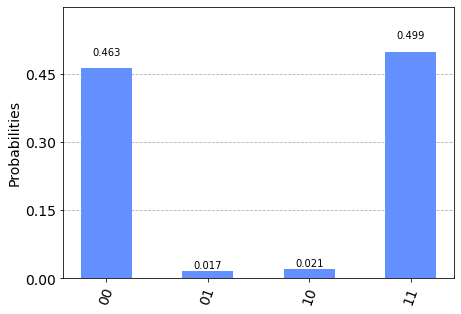

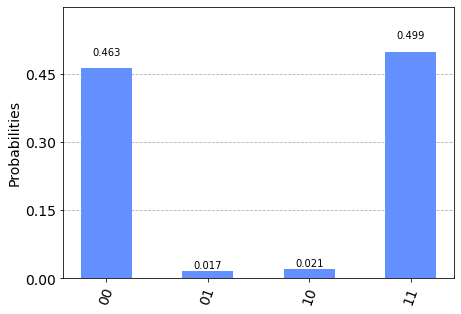

In [48]:
# p290 (p311 PDF)

# Import the NoiseModel
from qiskit.providers.aer.noise import NoiseModel
# Obtain the backend to simulate
backend = provider.get_backend('ibm_brisbane')
# Create the noise model based on the backend properties
noise_model = NoiseModel.from_backend(backend)

# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

# Execute the circuit on the simulator with the backend properties, 
# and generated noise model
result = execute(qc, Aer.get_backend('qasm_simulator'),
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()
# Obtain and print results
counts = result.get_counts()
plot_histogram(counts)


NoiseModel:
  Basis gates: ['cx', 'id', 'u1', 'u2', 'u3']
  Instructions with noise: ['u2', 'u3', 'u1', 'id']
  All-qubits errors: ['id', 'u1', 'u2', 'u3']


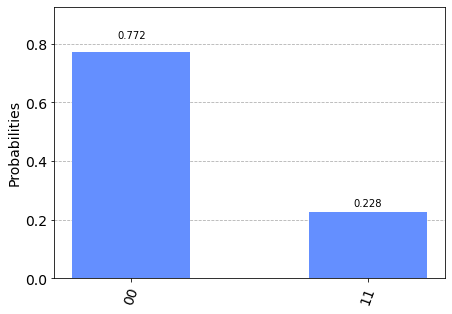

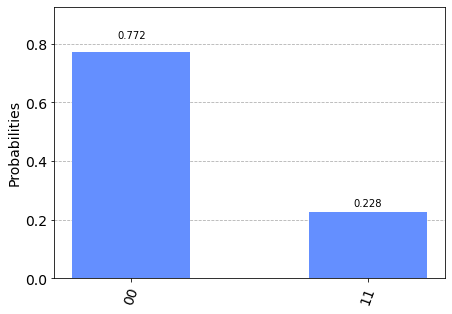

In [49]:
# p293 (p314 PDF)

# Initialize your T1 and T2 values
t1 = 0.0125  
t2 = 0.0025   

# Apply the T1 and T2 to create the thermal relaxation error
from qiskit.providers.aer.noise import thermal_relaxation_error
t_error = thermal_relaxation_error(t1, t2, 0.01)

# Add the errors to a noise model 
# and apply to all basis gates on all qubits
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(t_error, ['id', 'u1', 'u2', 'u3'])
# Print out the noise model 
print(noise_model) 

#Create the same 2-qubit quantum circuit as before
qc_error = QuantumCircuit(2,2)
qc_error.h(0)
qc_error.cx(0,1)
qc_error.measure(range(2), range(2))

# Set the simulator 
simulator = Aer.get_backend('qasm_simulator')
# Apply the noise model we created to the execution method
result = execute(qc_error, simulator, shots=1024, basis_gates=noise_model.basis_gates, noise_model=noise_model).result()

# Obtain results and print
counts = result.get_counts(qc_error)
plot_histogram(counts)


# Build your own noise model

In [50]:
# p296 (p317 PDF)

# Import the error classes and methods
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import ReadoutError

# Single and multi-qubit probability error
single_qubit_gate_p = 0.25  
multi_qubit_gate_p = 0.1   

# Apply the depolarizing quantum errors
single_error = depolarizing_error(single_qubit_gate_p, 1)
multi_error = depolarizing_error(multi_qubit_gate_p, 2)   


In [51]:
# p296 (p317 PDF)

# Add the single and multi-qubit errors to the noise model
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(single_error, ['u2'])
noise_model.add_all_qubit_quantum_error(multi_error, ['cx'])

# Print out the noise model
print(noise_model)


NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['u2', 'cx']
  All-qubits errors: ['u2', 'cx']


In [52]:
# p297 (p318 PDF)

# Set the readout error probabilities for 0 given 1, & 1 given 0,
p0_1 = 0.7
p1_0 = 0.2
p0 = 1 - p0_1
p1 = 1 - p1_0

# Construct the ReadoutError with the probabilities
readout_error = ReadoutError([[p0, p0_1], [p1_0, p1]])
# Apply the readout error to qubit 0. 
noise_model.add_readout_error(readout_error, [0])
# Print the noise model
print(noise_model)


NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['u2', 'measure', 'cx']
  Qubits with noise: [0]
  All-qubits errors: ['u2', 'cx']
  Specific qubit errors: [('measure', [0])]


In [53]:
# p298 (p319 PDF)

# Create a simple 2 qubit circuit
qc_error = QuantumCircuit(2,2)
qc_error.h(0)
qc_error.cx(0,1)
qc_error.measure(range(2), range(2))


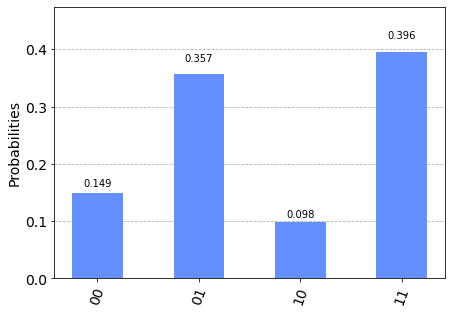

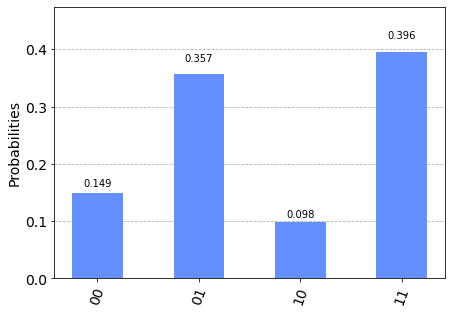

In [54]:
# p299 (p320 PDF)

# Get the Qasm Simulator
simulator = Aer.get_backend('qasm_simulator')
# Set the backend parameters, including our noise model, and execute
result = execute(qc_error, simulator, shots=1024, basis_gates=noise_model.basis_gates, noise_model=noise_model).result()
# Obtain the result counts and print
counts = result.get_counts(qc_error)
plot_histogram(counts)


In [55]:
import qiskit.tools.jupyter
%qiskit_version_table